In [1]:
import pandas as pd
import numpy as np
import sys
import math

# Prepare Data From Simulation Results

In [2]:
#Prepare Data From Model That Classifies Prob estimates
input_str='~/Documents/data/jurity_tests/simulations/model_v_prob/{0}_model_simulation_{1}_surrogates_{2}_count.csv'
sim_names=["fair","slightly_unfair","moderately_unfair","very_unfair","extremely_unfair"]
color_map={"fair":"0.9","slightly_unfair":"0.8","moderately_unfair":"0.45","very_unfair":"0.3","extremely_unfair":"0"}
all_simulations=[]
avg_counts=[50]
num_surrogates=[3588]
for name in sim_names:
    for c in avg_counts:
        for n_surrogates in num_surrogates:
            all_simulations.append(pd.read_csv(input_str.format(name,c,n_surrogates)))
simulations_model=pd.concat(all_simulations)

#Reduce to only simulations where probabilistic fairness is implemented
simulations_model=simulations_model[simulations_model["Metric"].apply(lambda x: x in ['Average Odds', 'Equal Opportunity', 'Predictive Equality','Statistical Parity'])]
print(simulations_model.shape)
simulations_model.head()


(2400, 9)


,Metric,model_estimate,class_PPV,class_NPV,class_TPR,p_given_p,np_given_np,run_id,simulation
0,Average Odds,0.004,0.919137,0.998937,0.990681,0.99,0.99,0,fair
2,Equal Opportunity,0.008,0.919137,0.998937,0.990681,0.99,0.99,0,fair
6,Predictive Equality,0.001,0.919137,0.998937,0.990681,0.99,0.99,0,fair
7,Statistical Parity,-0.000,0.919137,0.998937,0.990681,0.99,0.99,0,fair
9,Average Odds,0.006,0.910217,0.988489,0.898043,0.90,0.99,0,fair


In [3]:
simulations_model["p_given_p"].unique()

array([0.99, 0.9 , 0.8 , 0.7 ])

In [4]:
simulations_model["np_given_np"].unique()

array([0.99, 0.9 , 0.8 ])

In [5]:
#Prepare Data Calculated from Probabilistic Estimates
input_str='~/Documents/data/jurity_tests/simulations/model_v_prob/{0}_prob_simulation_{1}_surrogates_{2}_count.csv'
sim_names=["fair","slightly_unfair","moderately_unfair","very_unfair","extremely_unfair"]
color_map={"fair":"0.9","slightly_unfair":"0.8","moderately_unfair":"0.45","very_unfair":"0.3","extremely_unfair":"0"}
all_simulations=[]
avg_counts=[50]
num_surrogates=[3588]
for name in sim_names:
    for c in avg_counts:
        for n_surrogates in num_surrogates:
            all_simulations.append(pd.read_csv(input_str.format(name,c,n_surrogates)))
simulations_prob=pd.concat(all_simulations)
simulations_prob=simulations_prob[simulations_prob["Metric"].apply(lambda x: x in ['Average Odds', 'Equal Opportunity', 'Predictive Equality','Statistical Parity'])]
print(simulations_prob.shape)
simulations_prob.head()


(600, 5)


,Metric,oracle_value,probabilistic_estimate,run_id,simulation
0,Average Odds,0.004,0.010,0,fair
2,Equal Opportunity,0.008,0.011,0,fair
6,Predictive Equality,0.001,0.008,0,fair
7,Statistical Parity,-0.000,0.003,0,fair
9,Average Odds,-0.001,-0.005,1,fair


In [6]:
#Merge Model-Based Estimates with Probabilistic Estimates
simulations_raw=simulations_model.merge(simulations_prob,left_on=["Metric","simulation"],right_on=["Metric","simulation"])
simulations_raw["npv_plus_ppv_minus_1"]=simulations_raw["class_PPV"]+simulations_raw["class_NPV"]-1
simulations_raw["adjusted_SP"]=simulations_raw["npv_plus_ppv_minus_1"]*simulations_raw["oracle_value"]


In [7]:
simulations_raw.groupby(["Metric","simulation"]).count()

model_estimate  class_PPV  class_NPV  \
Metric              simulation                                                
Average Odds        extremely_unfair             3600       3600       3600   
                    fair                         3600       3600       3600   
                    moderately_unfair            3600       3600       3600   
                    slightly_unfair              3600       3600       3600   
                    very_unfair                  3600       3600       3600   
Equal Opportunity   extremely_unfair             3600       3600       3600   
                    fair                         3600       3600       3600   
                    moderately_unfair            3600       3600       3600   
                    slightly_unfair              3600       3600       3600   
                    very_unfair                  3600       3600       3600   
Predictive Equality extremely_unfair             3600       3600       3600   
                    fair                         3600       3600       3600   
                    moderately_unfair            3600       3600       3600   
                    slightly_unfair              3600       3600       3600   
                    very_unfair                  3600       3600       3600   
Statistical Parity  extremely_unfair             3600       3600       3600   
                    fair                         3600       3600       3600   
                    moderately_unfair            3600       3600       3600   
                    slightly_unfair              3600       3600       3600   
                    very_unfair                  3600       3600       3600   

                                       class_TPR  p_given_p  np_given_np  \
Metric              simulation                                             
Average Odds        extremely_unfair        3600       3600         3600   
                    fair                    3600       3600         3600   
                    moderately_unfair       3600       3600         3600   
                    slightly_unfair         3600       3600         3600   
                    very_unfair             3600       3600         3600   
Equal Opportunity   extremely_unfair        3600       3600         3600   
                    fair                    3600       3600         3600   
                    moderately_unfair       3600       3600         3600   
                    slightly_unfair         3600       3600         3600   
                    very_unfair             3600       3600         3600   
Predictive Equality extremely_unfair        3600       3600         3600   
                    fair                    3600       3600         3600   
                    moderately_unfair       3600       3600         3600   
                    slightly_unfair         3600       3600         3600   
                    very_unfair             3600       3600         3600   
Statistical Parity  extremely_unfair        3600       3600         3600   
                    fair                    3600       3600         3600   
                    moderately_unfair       3600       3600         3600   
                    slightly_unfair         3600       3600         3600   
                    very_unfair             3600       3600         3600   

                                       run_id_x  oracle_value  \
Metric              simulation                                  
Average Odds        extremely_unfair       3600          3600   
                    fair                   3600          3600   
                    moderately_unfair      3600          3600   
                    slightly_unfair        3600          3600   
                    very_unfair            3600          3600   
Equal Opportunity   extremely_unfair       3600          3600   
                    fair                   3600          3600   
                    moderately_unfair     

In [8]:
simulations_raw.groupby(["Metric","simulation"])[["oracle_value","probabilistic_estimate","model_estimate"]].describe().head(n=100)

oracle_value                             \
                                             count      mean       std    min   
Metric              simulation                                                  
Average Odds        extremely_unfair        3600.0 -0.349467  0.005609 -0.364   
                    fair                    3600.0 -0.000167  0.003348 -0.007   
                    moderately_unfair       3600.0 -0.277800  0.005161 -0.288   
                    slightly_unfair         3600.0 -0.172633  0.005283 -0.185   
                    very_unfair             3600.0 -0.375833  0.005646 -0.387   
Equal Opportunity   extremely_unfair        3600.0 -0.548933  0.011327 -0.581   
                    fair                    3600.0  0.000133  0.005353 -0.010   
                    moderately_unfair       3600.0 -0.355000  0.009421 -0.371   
                    slightly_unfair         3600.0 -0.246267  0.009765 -0.270   
                    very_unfair             3600.0 -0.551433  0.010110 -0.572   
Predictive Equality extremely_unfair        3600.0 -0.150167  0.002340 -0.157   
                    fair                    3600.0 -0.000467  0.003344 -0.010   
                    moderately_unfair       3600.0 -0.200433  0.002975 -0.206   
                    slightly_unfair         3600.0 -0.098900  0.002427 -0.103   
                    very_unfair             3600.0 -0.200267  0.002323 -0.206   
Statistical Parity  extremely_unfair        3600.0 -0.470000  0.001880 -0.476   
                    fair                    3600.0 -0.000200  0.004045 -0.010   
                    moderately_unfair       3600.0 -0.335467  0.003223 -0.344   
                    slightly_unfair         3600.0 -0.184167  0.002570 -0.189   
                    very_unfair             3600.0 -0.415233  0.002837 -0.420   

                                                                    \
                                         25%     50%    75%    max   
Metric              simulation                                       
Average Odds        extremely_unfair  -0.354 -0.3490 -0.345 -0.339   
                    fair              -0.002  0.0000  0.003  0.006   
                    moderately_unfair -0.282 -0.2790 -0.273 -0.268   
                    slightly_unfair   -0.176 -0.1735 -0.170 -0.162   
                    very_unfair       -0.380 -0.3760 -0.371 -0.365   
Equal Opportunity   extremely_unfair  -0.554 -0.5485 -0.544 -0.522   
                    fair              -0.004 -0.0010  0.005  0.009   
                    moderately_unfair -0.362 -0.3575 -0.347 -0.333   
                    slightly_unfair   -0.253 -0.2455 -0.241 -0.225   
                    very_unfair       -0.560 -0.5515 -0.543 -0.533   
Predictive Equality extremely_unfair  -0.151 -0.1500 -0.148 -0.146   
                    fair              -0.001  0.0000  0.002  0.005   
                    moderately_unfair -0.203 -0.2000 -0.198 -0.194   
                    slightly_unfair   -0.101 -0.0990 -0.098 -0.094   
                    very_unfair       -0.202 -0.2000 -0.199 -0.194   
Statistical Parity  extremely_unfair  -0.471 -0.4700 -0.469 -0.467   
                    fair              -0.002  0.0000  0.002  0.009   
                    moderately_unfair -0.338 -0.3350 -0.333 -0.330   
                    slightly_unfair   -0.186 -0.1840 -0.183 -0.177   
                    very_unfair       -0.418 -0.4150 -0.413 -0.410   

                                      probabilistic_estimate            ...  \
                                                       count      mean  ...   
Metric              simulation                                          ...   
Average Odds        extremely_unfair                  3600.0 -0.350800  ...   
                    fair                              3600.0  0.000100  ...   
                    moderately_unfair                 3600.0 -0.279167  ...   
                    slightly_unfair                   3600.0 -0.171800  ...   
          

In [9]:
print("There are {0} NaN Values".format(simulations_raw["oracle_value"].apply(np.isnan).sum()))

There are 0 NaN Values


In [10]:
print("Review How Many Values Per Combination of PPV and NPV")
simulations_model.groupby(["p_given_p","np_given_np"])["model_estimate"].count()

Review How Many Values Per Combination of PPV and NPV


p_given_p  np_given_np
0.70       0.80           600
0.80       0.90           600
0.90       0.99           600
0.99       0.99           600
Name: model_estimate, dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_one_metric(df,stat_name,
                    compare_to="probabilistic_estimate",
                    x_axis="oracle_value",
                    color_map=color_map,
                    sim_names=["fair","slightly_unfair","moderately_unfair","very_unfair","extremely_unfair"],
                   markers={"fair":".","slightly_unfair":"v","moderately_unfair":"s","very_unfair":"*","extremely_unfair":"X"},
                   x_label=None,y_label=None,title=None):
    subset=df[df["Metric"]==stat_name]
    if stat_name=="Statistical Parity":
        lowest=-0.51
        highest=0.025
    else:
        lowest=np.minimum(subset[x_axis].min(),subset[compare_to].min())
        highest=np.maximum(subset[x_axis].max(),subset[compare_to].max())
    plt.axline([lowest,lowest],[highest,highest],linewidth=1.5,c='0.0')
    for name in sim_names:
        o=subset[subset["simulation"]==name][x_axis]
        p=subset[subset["simulation"]==name][compare_to]
        plt.scatter(o,
                    p,
                    c=color_map[name],label=name.replace("_"," ").title(),marker=markers[name])
    if x_label is None:
        x_label=x_axis
    if y_label is None:
        y_label=compare_to
    if title is None:
        title=stat_name
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend(title="Simulation Setting")
    plt.savefig(f"{stat_name}_{compare_to}_{x_axis}.png".lower().replace(" ","_"),dpi=300)
    plt.show()

In [13]:
def plot_model_estimate(df,stat_name,
                    compare_to="model_estimate",
                    x_axis="oracle_value",
                    color_map=color_map,
                    sim_names=["fair","slightly_unfair","moderately_unfair","very_unfair","extremely_unfair"],
                   markers={"fair":".","slightly_unfair":"v","moderately_unfair":"s","very_unfair":"*","extremely_unfair":"X"},
                   x_label=None,y_label=None,title=None):
    subset=df[df["Metric"]==stat_name]
    if stat_name=="Statistical Parity":
        lowest=-0.51
        highest=0.025
    else:
        lowest=np.minimum(subset[x_axis].min(),subset[compare_to].min())
        highest=np.maximum(subset[x_axis].max(),subset[compare_to].max())
    linestyles=[':','--','-.','-']
    l=0
    for ppv in subset["p_given_p"].unique():
        for npv in subset["np_given_np"].unique(): 
            fit=subset[(subset["p_given_p"]==ppv) & (subset["np_given_np"]==npv)]
            if fit.shape[0]>0:
                oracle=fit["oracle_value"].values
                model=fit["adjusted_SP"].values
                v=fit["class_PPV"].values[0]+fit["class_NPV"].values[0]
                plt.plot(oracle,model,linestyles[l],label="PPV+NPV={:0.2f}".format(v),c='0.4')
                l=l+1
    plt.axline([lowest,lowest],[highest,highest],linewidth=2,c='0.0',label='45 degrees')
    for name in sim_names:
        o=subset[subset["simulation"]==name][x_axis]
        p=subset[subset["simulation"]==name][compare_to]
        plt.scatter(o,
                    p,
                    c=color_map[name],marker=markers[name])
    if x_label is None:
        x_label=x_axis
    if y_label is None:
        y_label=compare_to
    if title is None:
        title=stat_name
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend(title="Protected Classifier Performance")
    plt.savefig(f"{stat_name}_{compare_to}_{x_axis}.png".lower().replace(" ","_"),dpi=300)    
    plt.show()

In [14]:
#other options: YlGnBu,cubehelix,gnuplot
cmap = plt.get_cmap('gnuplot')
snames=["fair","slightly_unfair","moderately_unfair","very_unfair","extremely_unfair"]
indicies = np.linspace(0, cmap.N, len(snames))
my_colors = {s:cmap(int(i)) for s,i in zip(snames,indicies)}
my_colors

{'fair': (0.0, 0.0, 0.0, 1.0),
 'slightly_unfair': (0.5009794328681196,
  0.015809545348320027,
  0.9999810273487268,
  1.0),
 'moderately_unfair': (0.7084919084320762, 0.12647636278656021, 0.0, 1.0),
 'very_unfair': (0.8677218312746247, 0.4268577244046407, 0.0, 1.0),
 'extremely_unfair': (1.0, 1.0, 0.0, 1.0)}

/var/folders/s_/9wh_dsgx63vgx9fj7w1tsprx597k19/T/ipykernel_17354/3098052042.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(o,


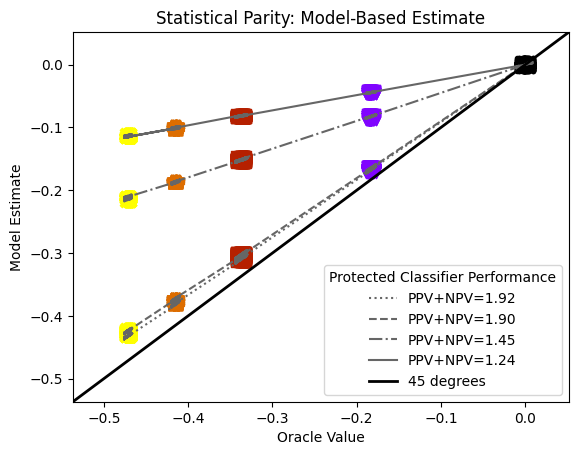

In [15]:
plot_model_estimate(simulations_raw,"Statistical Parity",
                    compare_to="model_estimate",title="Statistical Parity: Model-Based Estimate",
                    color_map=my_colors,
                   x_label="Oracle Value",
                   y_label="Model Estimate")


/var/folders/s_/9wh_dsgx63vgx9fj7w1tsprx597k19/T/ipykernel_17354/1680928571.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(o,


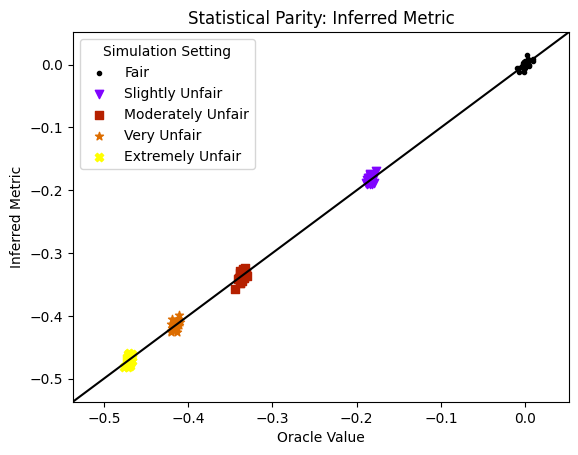

In [16]:
plot_one_metric(simulations_prob,"Statistical Parity",compare_to="probabilistic_estimate",
                title="Statistical Parity: Inferred Metric",
                color_map=my_colors,
               x_label="Oracle Value",
               y_label="Inferred Metric")

In [17]:
mse=pd.DataFrame(sum_squares_error).merge(sum_of_squares_oracle,left_index=True, right_index=True,how="outer").merge(df,left_index=True,right_index=True,how="outer")
mse["mean_squared_error"]=mse["sum"]/(mse["count"]-mse["df"])
mse["root_mean_squared_error"]=mse["mean_squared_error"].apply(np.sqrt)
mse["cd"]=mse["sum"]/mse["oracle_sum_of_squares"]

mse=mse.reset_index()
mse


NameError: name 'sum_squares_error' is not defined

In [ ]:
standard_deviations=standard_deviations.reset_index()
simulations=simulations.reset_index()

In [ ]:
mse["cd"].hist()